<a href="https://colab.research.google.com/github/Sachin8700/Coronovirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -         **Coronavirus Tweet Sentiment Analysis**

---



##### **Project Type**    - Classification Project
##### **Contribution**    - Team
##### **Team Member 1 - Sachin**
##### **Team Member 2 - Prashant Singh**
##### **Team Member 3 - Jaanhavi Khandelwal**


# **Project Summary -**

The COVID-19 pandemic is a global outbreak of the coronavirus, an infectious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) virus.

In December 2019, the initial instances of the new coronavirus (nCoV) surfaced in China, and soon after, the virus rapidly disseminated to other nations worldwide. Consequently, on January 30, 2020, the WHO announced a global public health emergency, followed by the categorization of the outbreak as a pandemic on March 11, 2020.

In the wake of the COVID-19 pandemic, a significant number of lives have been lost in the European region. The latest statistics indicate that the death toll in the region has surpassed 2 million, which is a staggering figure. This pandemic has caused unprecedented disruptions to people's lives and communities, affecting every aspect of human existence. The virus has proved to be highly contagious, spreading rapidly and leading to severe respiratory illness, among other complications. As a result, many nations have been forced to implement strict measures such as lockdowns and travel restrictions to control the spread of the virus. Despite these efforts, the death toll continues to climb, leaving families and communities devastated by the loss of loved ones. The impact of COVID-19 on the European region has been profound, and it is essential that efforts to control the pandemic continue to be a top priority for individuals, governments, and international organizations.

Analyzing the sentiments expressed in tweets related to the coronavirus can yield useful information about the public's views and attitudes toward the virus. By examining changes in sentiment over time, pinpointing influential users and groups, and identifying specific topics or concerns related to the virus, valuable insights can be gained. However, it is important to recognize that performing sentiment analysis is not a simple task and results may differ depending on the dataset, pre-processing, and modeling techniques employed. This type of analysis can be difficult due to informal language, the use of slang and emoticons, and the prevalence of sarcasm and irony in tweets.



1. Over time, the number of social media users has been on the rise due to their addiction to the informative content available, and as a result, the volume of data is also increasing. To address this trend, there has been a growing focus on using natural language processing (NLP) in combination with various algorithms and artificial intelligence (AI) techniques to enable efficient extraction of meaningful information from the data. 

2. NLP and its applications have had a significant impact on social media text analysis and classification; however, problems with determining the inherent importance of content using NLP strategies such as contextual phrases and words, and ambiguity in the text or speech, require the use of ML-based algorithms. 

3. This study utilized Twitter data to conduct sentiment analysis and investigate the increased fear linked to the coronavirus. While traditional methods have been used to identify human behavior and characteristics, employing NLP techniques allows for swift sentiment classification, potentially enhancing analysis. 

4. Throughout the Sentiment Analysis project, a range of techniques were utilized, including data loading, data wrangling, exploratory data analysis (EDA) with data visualization, text preprocessing, addressing dataset imbalances, tfidf vectorization, and implementing a multiclass classification model through train-test splitting.

# **GitHub Link -**

# **Problem Statement**


**with the help of this project we  build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been collected from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

**We have the following information:**

**usename** **:-** **Coded username**

**screen name** **:-** **Coded Screen Name**

**Location** **:-** **Region of origin**

**Tweet At** **:-** **Tweet Timming**

**Original Tweet** **:-** **First tweet in the thread**

**Sentiment** **:-** **Sentiment of the tweet**

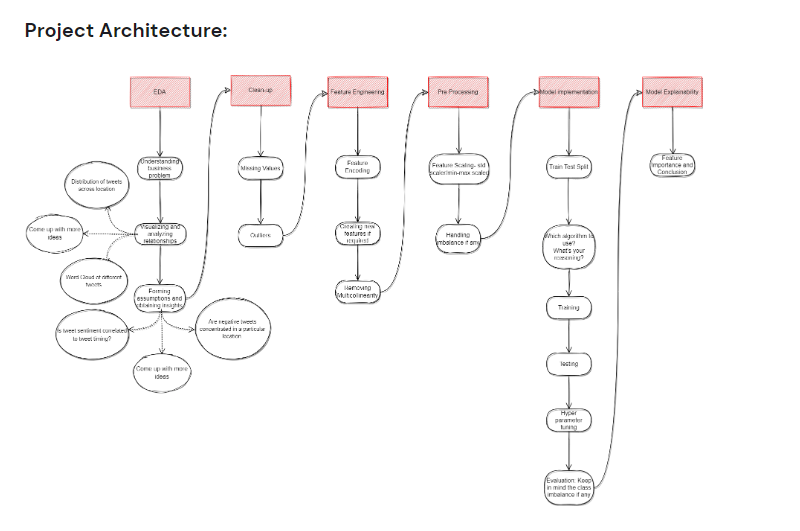

### Things to do-:
1. Performing Exploratory data analysis to Visualise the dataset with 15 different plots.
3. Text Preprocessing by nltk.
4. Creating the Final Dataframe to which we will build the model with the required columns.
5. To apply TFIDF Vectorisation technique.
6. Data Imbalance handling BY SMOTE.
7. Splitting the Data into train and test.
8. Building Machine Learning Models.
9. Comparing Different ML model's performance.
10. Conclusion.

## **Mounting the  Google drive to access the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing all the necessary libraries

In [1]:
#First we are importing all the essential libraries used in our analysis.

## EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno
from datetime import datetime

##Text Preprocessing Libraries
import nltk
from wordcloud import WordCloud
import string


##Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Loading the Dataset
Tweetes_data = pd.read_csv('/content/Coronavirus Tweets.csv', encoding= 'ISO-8859-1', low_memory=False)
##Here we have used encoding = 'ISO-8859-1' to deal with the unicode error

In [3]:
# Dataset top 5 entries with the help of head function
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Numbers of rows and columns present in the dataset

In [4]:
# Dataset Rows & Columns count with shape function
Tweetes_data.shape   


(41157, 6)

**Shape()**: The shape property returns a tuple containing the shape of the DataFrame.

### Basic information of the dataset

In [5]:
# Dataset Info
Tweetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**info():** The info() method prints information about the DataFrame.

#### AS we can see that there are some null values present in the location column

#### finding number of duplicae values

In [6]:
# Dataset Duplicate Value Count
Tweetes_data.duplicated().sum()

0

#### There are no duplicate values in our dataset

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
Tweetes_data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<AxesSubplot:>

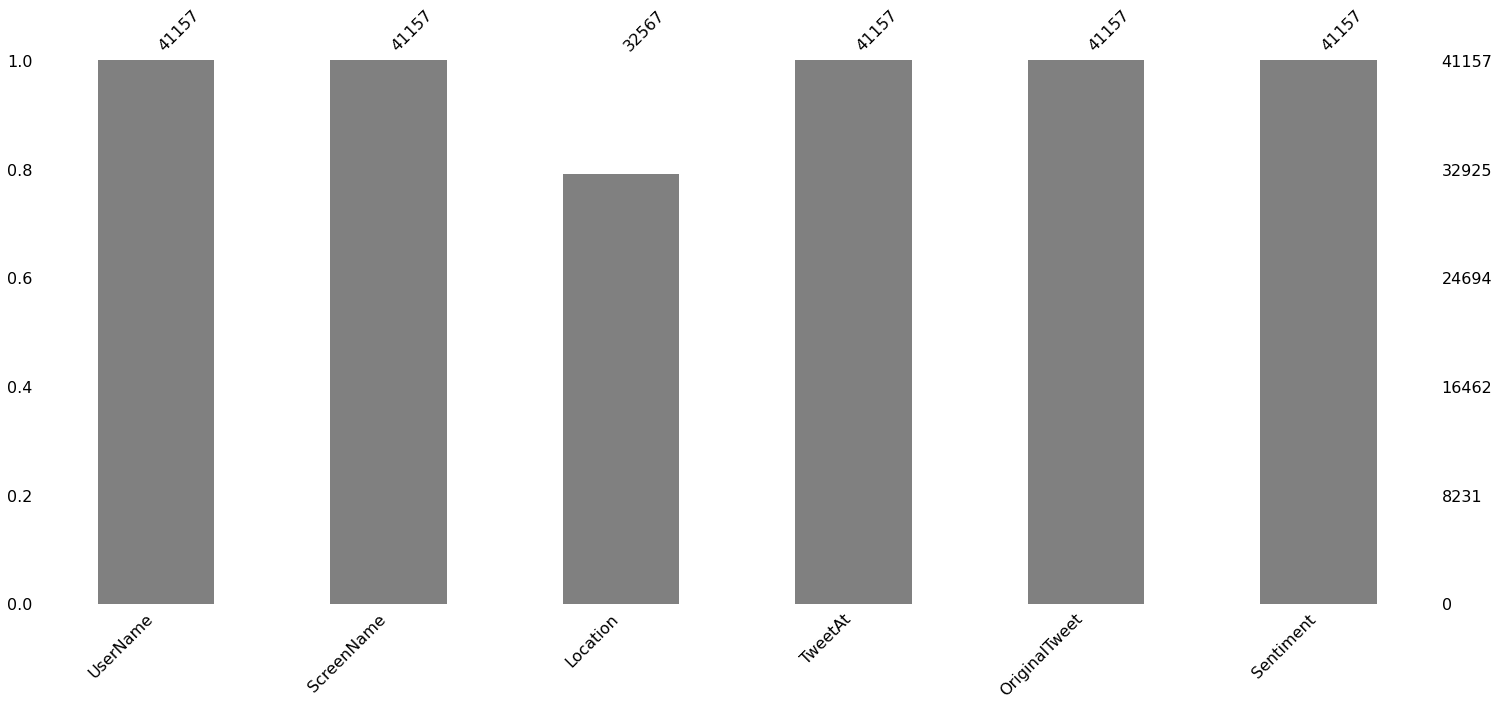

In [8]:
# Visualizing the missing values
msno.bar(Tweetes_data, color='grey')

### Information about the Dataset

#### 1. We can see that there are 41,157 observations and 6 features in our dataset.
#### 2. There are no duplicate values in our dataset.
#### 3. There are many null values in location column in our dataset.
#### 4. This dataset contains the tweets from different users, all tweets are related to COVID19.
#### 5. And Sentiments values are given that describes the sentiment related to a particular tweet, it determines if the tweet is positive, negative, extremely positive, extremely negative or neutral.

## **Understanding the Variables**

In [9]:
# all the columns present in the dataset
Tweetes_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [10]:
# description of the dataset
Tweetes_data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

#### 1. There are total 6 variables present in our dataset.
#### 2. One of the most important features are OriginalTweet and Sentiment.
#### 3. We have quite a good number of null values in the  Location feature.
#### 4. There are 2 numerical features in our dataset, which are UserName and ScreenName.
#### 5. Also we have a column named 'TweetAt' that specify the date when the tweet was posted by the user.

### Checking Unique Values for each variable.

In [11]:
Tweetes_data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

**unique ()** function is a function that returns the unique values from the given lists or array of values.

In [12]:
# A for loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).
data_columns_list = Tweetes_data.columns.to_list()
for i in data_columns_list:
  print('\033[1m'+'\n\nThe Number of Unique Values in'+'\033[0m','\033[1m'+ i+'\033[0m', 'are:', Tweetes_data[i].unique())



The Number of Unique Values in UserName are: [ 3799  3800  3801 ... 44953 44954 44955]


The Number of Unique Values in ScreenName are: [48751 48752 48753 ... 89905 89906 89907]


The Number of Unique Values in Location are: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


The Number of Unique Values in TweetAt are: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']


The Number of Unique Values in OriginalTweet are: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create 

## **Data Wrangling**

In [13]:
# Our dataset contains Text data so its better to convert it into string as its textual content.
Tweetes_data['OriginalTweet']=Tweetes_data['OriginalTweet'].astype(str)
Tweetes_data['Sentiment']=Tweetes_data['Sentiment'].astype(str)
     

In [14]:
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**NLTK (Natural Language Toolkit)** :is the go-to API for NLP (Natural Language Processing) with Python. It is used to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.


In [15]:
#importing ntlk
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
## Creating new columns that represents the count of characters, words and sentences in a tweet
Tweetes_data['num_char']= Tweetes_data['OriginalTweet'].apply(len)
Tweetes_data['num_words'] = Tweetes_data['OriginalTweet'].apply(lambda x:len(nltk.word_tokenize(x)))
Tweetes_data['num_sentences'] = Tweetes_data['OriginalTweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4


In [18]:
## Checking out highest number of tweets posted by which location
Tweetes_data.Location.value_counts().head()

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
Name: Location, dtype: int64

In [19]:
Tweetes_data.shape

(41157, 9)

In [20]:
Tweetes_data['UserName'].nunique()

41157

### What all manipulations have you done and insights you found?

#### 1. In the first step  we converted our text data into string format.
#### 2. After that we Created new columns that represents the count of characters, words and sentences in a tweet, which will further help us in analysing the data through visuals.
#### 3. After that, we calculated Which location has the highest number of tweets.

##  **Data Visualisation & Exploratory Data Analysis(EDA)**

#### Total percent of Sentiment count with respect to their Tweets.

<AxesSubplot:ylabel='OriginalTweet'>

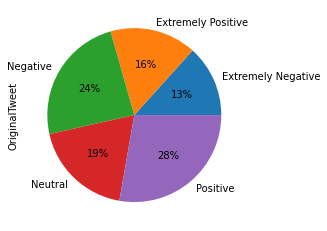

In [21]:
#Pie plot
Tweetes_data.groupby('Sentiment')['OriginalTweet'].count().plot(kind = 'pie', autopct='%.0f%%', textprops={'fontsize': 10})

##### 1. Why did you pick the specific chart?

##### 1. We picked this pie chart to plot the relationship between Sentiment and OriginalTweet

##### 2. Pie charts are simple and easy to read, making them an effective way to convey information to a broad audience..

##### 2. What is/are the insight(s) found from the chart?

##### **As we can see from the above visual that 28% tweets are positive, 16% are extremely positive, 37% are negative, 13% are extremely negative and 19% tweets are neutral. There are good number of positive tweets that shows positive mindset of people during the pandemic.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

##### **As the sentiment of many tweets are positive so business can look forward to run ads related to more positive content, so that the click-through rates will increase and also the revenue.**

#### Number of character counts present in the tweet and their sentiments.


Text(0.5, 1.0, 'The Number of Sentences and Sentiment Relation')

<Figure size 1080x720 with 0 Axes>

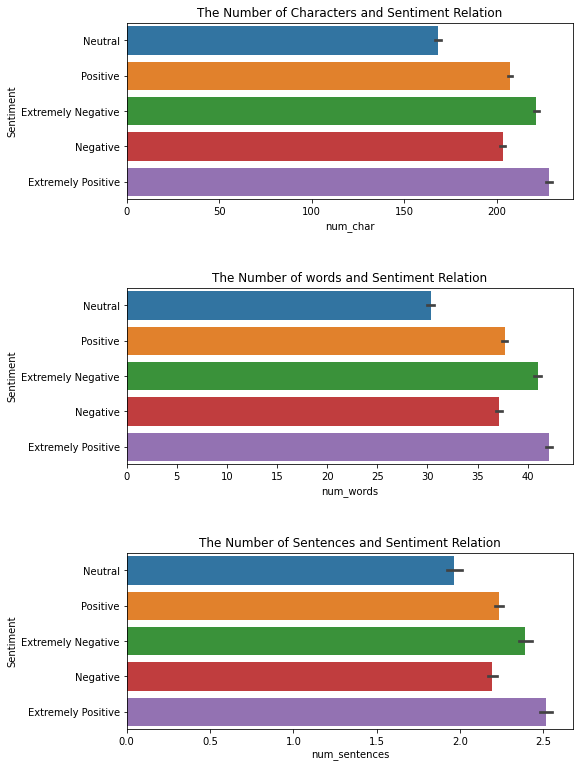

In [ ]:
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,13)) 
ax = axes.flatten()
sns.barplot(data=Tweetes_data, x='num_char', y='Sentiment', ax=ax[0])
plt.subplots_adjust(hspace=0.5, wspace=0.2)
sns.barplot(data=Tweetes_data, x='num_words', y='Sentiment', ax=ax[1])
sns.barplot(data=Tweetes_data, x='num_sentences', y='Sentiment', ax=ax[2])
ax[0].set_title('The Number of Characters and Sentiment Relation')
ax[1].set_title('The Number of words and Sentiment Relation')
ax[2].set_title('The Number of Sentences and Sentiment Relation')

##### 1. Why did you pick the specific chart?

##### 1. We Picked this specific chart to plot the relation between character count of tweets and sentiments, word count of tweets and sentiment, and sentence count of tweets and sentiment.
##### 2. We used this specific chart because bar plot is a graph that represents the distribution of a categorical or discrete dataset.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment, so there will be no impact upon the business because of this.

#### Average length of Tweets made by the users.

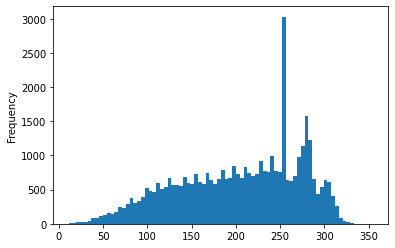

In [ ]:
#histogram plot
Tweetes_data['num_char'].plot(bins=80, kind='hist')


In [ ]:
Tweetes_data['num_char'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: num_char, dtype: float64

In [ ]:
# # Where Number of Character are 11
Tweetes_data[Tweetes_data['num_char'] == 11]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
9776,13575,58527,"Scotland, United Kingdom",20-03-2020,Be like Bob,Positive,11,3,1
16872,20671,65623,?? ?,23-03-2020,Cartoon for,Neutral,11,2,1
20467,24266,69218,Coastal Elite ?,25-03-2020,Omg y all,Neutral,11,3,1
35526,39325,84277,"Indore, India",09-04-2020,amp,Neutral,11,1,1


In [ ]:
# Where Number of Character are 355
Tweetes_data[Tweetes_data['num_char'] == 355]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
25160,28959,73911,"Melbourne, Australia",30-03-2020,Crude oil dropped to its lowest in 17 years in...,Extremely Negative,355,57,2


In [ ]:
Tweetes_data[Tweetes_data['num_char'] == 355]['OriginalTweet'].iloc[0]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [ ]:
# Where Number of Character are 355
Tweetes_data[Tweetes_data['num_char'] == 280]


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,280,52,4
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative,280,61,6
53,3852,48804,NaN,16-03-2020,"Dear Coronavirus, \r\r\nI've been following so...",Positive,280,52,5
374,4173,49125,East Central Alberta,16-03-2020,#NewZealand beef exports to U.S. and Canada ar...,Extremely Positive,280,53,5
408,4207,49159,"Wayne, NJ",16-03-2020,Anyone who suspects price gouging and other CO...,Extremely Negative,280,48,2
...,...,...,...,...,...,...,...,...,...
40999,44798,89750,United States,14-04-2020,Company Withdraws Fiscal 2020 Financial Guidan...,Positive,280,59,1
41018,44817,89769,https://ivotoniut.blogspot.com,14-04-2020,In #Italy the composition has always been indi...,Negative,280,60,4
41027,44826,89778,"Toronto, ONT, Canada",14-04-2020,this deck by .@lukew in insanely good - great ...,Extremely Positive,280,52,5
41032,44831,89783,Connecticut,14-04-2020,"Thank you to all our health care workers , doc...",Extremely Positive,280,53,3


##### 1. Why did you pick the specific chart?

Histograms can provide insight into the shape and characteristics of a distribution, such as the location and spread of the data.

##### 2. What is/are the insight(s) found from the chart?



*   The length of the shortest tweet is 11
*   The length of the longest tweet is 355, and it is from Melbourne, Australia. The Sentiment of this tweet is negative
*   The average length of tweets that is number of characters lies between 250-300.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These length of tweets can help the business in spam classification also

#### Tweet and sentiment relation.

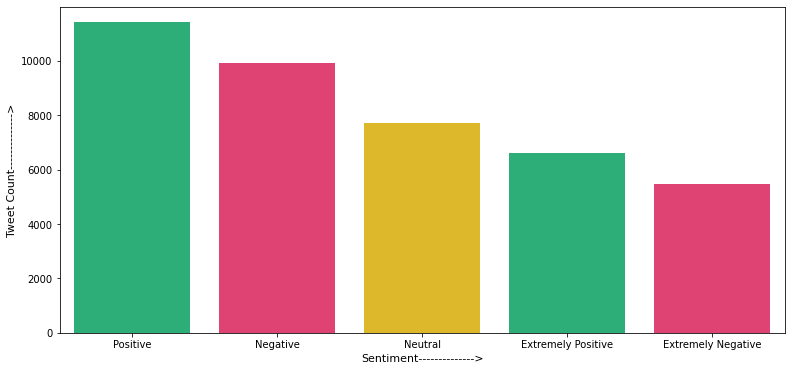

In [ ]:
# ploting countplot for "Sentiment" column
plt.figure(figsize=(13,6))
sns.countplot('Sentiment',data=Tweetes_data,order=Tweetes_data.Sentiment.value_counts().index,palette = ['#17C37B','#F92969','#FACA0C'])
plt.xlabel("Sentiment-------------->", fontsize=11)
plt.ylabel("Tweet Count-------------->", fontsize=11)
plt.xticks()
plt.show()

##### 1. Why did you pick the specific chart?

* To Plot the countplot between difeerent classes in Setiment column.
* To check out the number of Tweets and sentiment relation.
* Countplots are useful for comparing the frequency distribution of multiple categorical variables at once, providing insight into how the different categories relate to each other.

##### 2. What is/are the insight(s) found from the chart?

* We have 10k+ Tweets of Positive Sentiment.
* We have 9k+ tweets of Negative Sentiment.
* We have 7k+ Tweets of Neutral Sentiment.
* The number of Extremely positive and Negative tweets are on the lower side but still there are good number of such tweets.
* Tweets with positve sentiments are the highest in number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there are more number of positive tweets, negative tweets are not less in number. So, company may try to run some social campaign that is based on spreading the positivity throughout the community, which will benefit the company as it'll increase the loyalty and trust of users in the company.

#### Frequency of popularily used hashtag word such as "coronavirus","COVID2019","covid19" etc.. in our OriginalTweet Column.

In [ ]:
# Barplot for hashtags

import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
Tweetes_data['hash']=Tweetes_data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=Tweetes_data['hash'].value_counts()[:][1:6]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
temp

## The above function find_ash use the regular expression module i.e. re. The function uses the re (regular expression) module to search for hashtags in the input string. The findall function of the re module is used to find all the hashtags in the string. The findall function takes a regular expression pattern as an argument and returns a list of all the matches.
## The regular expression pattern r'(?<=#)\w+' is used to match hashtags. The \w+ part of the pattern matches one or more alphanumeric characters (a-z, A-Z, 0-9). The (?<=#) part of the pattern specifies that the match should be preceded by a "#" symbol. This ensures that only words that start with "#" are matched as hashtags.

## Finally, the join function is used to join the list of hashtags into a single string, with a space character between each hashtag. This resulting string is returned by the function.

,Hashtag,count
0,coronavirus,2670
1,Covid_19,652
2,Coronavirus,541
3,COVID2019,415
4,coronavirus COVID19,215


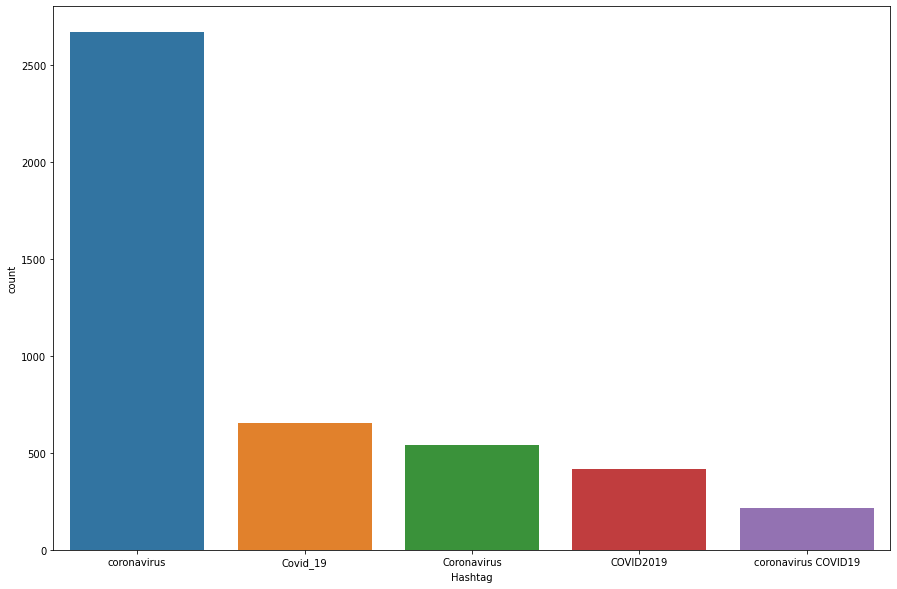

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.barplot(temp["Hashtag"],temp["count"])     

##### 1. Why did you pick the specific chart?

* We have used this plot to plot the graph for different hashtags used in tweets and to check their frequency.
*  Bar plots are a powerful tool for visualizing and comparing categorical data. They are easy to read, customizable, and suitable for a wide range of data types and audience types. With their simplicity and flexibility, bar plots are a go-to choice for many data analysts and researchers.

##### 2. What is/are the insight(s) found from the chart?

* coronavirus Hashtag is the most used hashtag in the tweets that are given in our dataset.
* It has been used 2670 times by different users in their tweets.
* Other popular hashtags are Covid_19 with frequency 652, Coronavirus with frequency 541, COVID2019 with frequency 415, and the last one that is coronavirus COVID19 with frequency 215

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can use this insight to keep a check on what's trending and why is it in the trend, so that it could help in posting targeted ads and relatable campaigns throughout the platform.

#### Mostly tagged people across the community.

In [ ]:
import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
Tweetes_data['tags']=Tweetes_data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=Tweetes_data['tags'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Tag','tags':'count'})
temp

,Tag,count
0,realDonaldTrump,125
1,YouTube,74
2,BorisJohnson,62
3,Tesco,61
4,amazon,59
5,FTC,45
6,sainsburys,41
7,McKinsey,33
8,piersmorgan,33
9,narendramodi,31


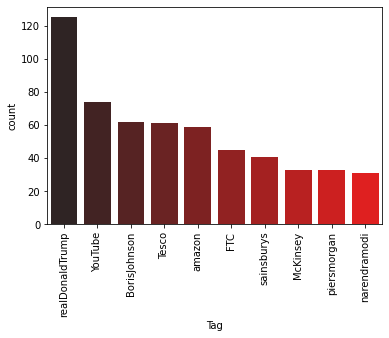

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x="Tag",y="count", data = temp,palette="dark:red")

##### 1. Why did you pick the specific chart?

Here we have used barplot to check the plot of different tags used by people in their tweets, which accounts were mostly tagged by people across the community.

##### 2. What is/are the insight(s) found from the chart?

realDonaldTrump is the tag that's been mostly used by people across the world. DonalTrump was president of America at that time, and that's why people had tagged him the most in order to tell the severity of situations in different areas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this company can find out the most famous and trending celebrities on their platform.

#### Location with respect to tweet count.

In [ ]:
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,


In [ ]:
# We are filling the misssing values with a blank space, as we can't drop the column because it has 17k+ values 
Tweetes_data['Location'].fillna('', inplace = True)

In [ ]:
x = Tweetes_data.copy()

In [ ]:
x.rename(columns = {'Sentiment':'Tweet Count'}, inplace = True)

In [ ]:
world_plot = x.groupby(['Location'], as_index=False).count()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(world_plot, locations='Location', locationmode='country names', 
                    color='Tweet Count', hover_name= 'Location', projection='orthographic')

In [ ]:
fig.show()

In [ ]:
Tweetes_data['Location'].nunique()

12221

In [ ]:
Tweetes_data.shape

(41157, 11)

In [ ]:
Tweetes_data[Tweetes_data['Location'] == 'Kinshasa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
20381,24180,69132,Kinshasa,25-03-2020,She does not have a face mask to wear amp has ...,Extremely Positive,217,44,1,,


In [ ]:
Tweetes_data[Tweetes_data['Location'] == 'Alberton, South Africa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
40360,44159,89111,"Alberton, South Africa",13-04-2020,@HeidiGiokos @flysaa So disturbing that SA is ...,Positive,255,45,3,,HeidiGiokos flysaa


In [ ]:
Tweetes_data[Tweetes_data['Location'] == 'Namibia']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
21105,24904,69856,Namibia,25-03-2020,Providers of healthcare and hygiene products i...,Negative,227,34,1,,
21301,25100,70052,Namibia,25-03-2020,Mara this fools keep on suprising me. They wan...,Negative,238,45,4,,
24635,28434,73386,Namibia,27-03-2020,Even during DStv is just increasing their pric...,Negative,64,10,1,,
29979,33778,78730,Namibia,06-04-2020,Food Security The current demand is high even ...,Positive,260,43,1,,
29980,33779,78731,Namibia,06-04-2020,Our priority Number 1: is Airport or Food Secu...,Extremely Positive,72,14,2,,


##### 1. Why did you pick the specific chart?

* We used this chart to plot the relation between number of tweets and the location of the users who posted those tweets
* We have applied groupby on location to get the specific data to plot this chloropeth map.


##### 2. What is/are the insight(s) found from the chart?

Our number of tweets data is quite distributed across different locations, like In kinshasha and Alberton there are only 1 number of tweets while there are 5 tweets posted from Namibia 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company may learn which are the most active locations from where tweets are being posted by using this graphic and its insights. And can go on to develop more focused revenue-generating marketing strategies.

#### Visual representation of TweetAt Column

Text(0.5, 1.0, 'Counted the Plot of Tweeted Date')

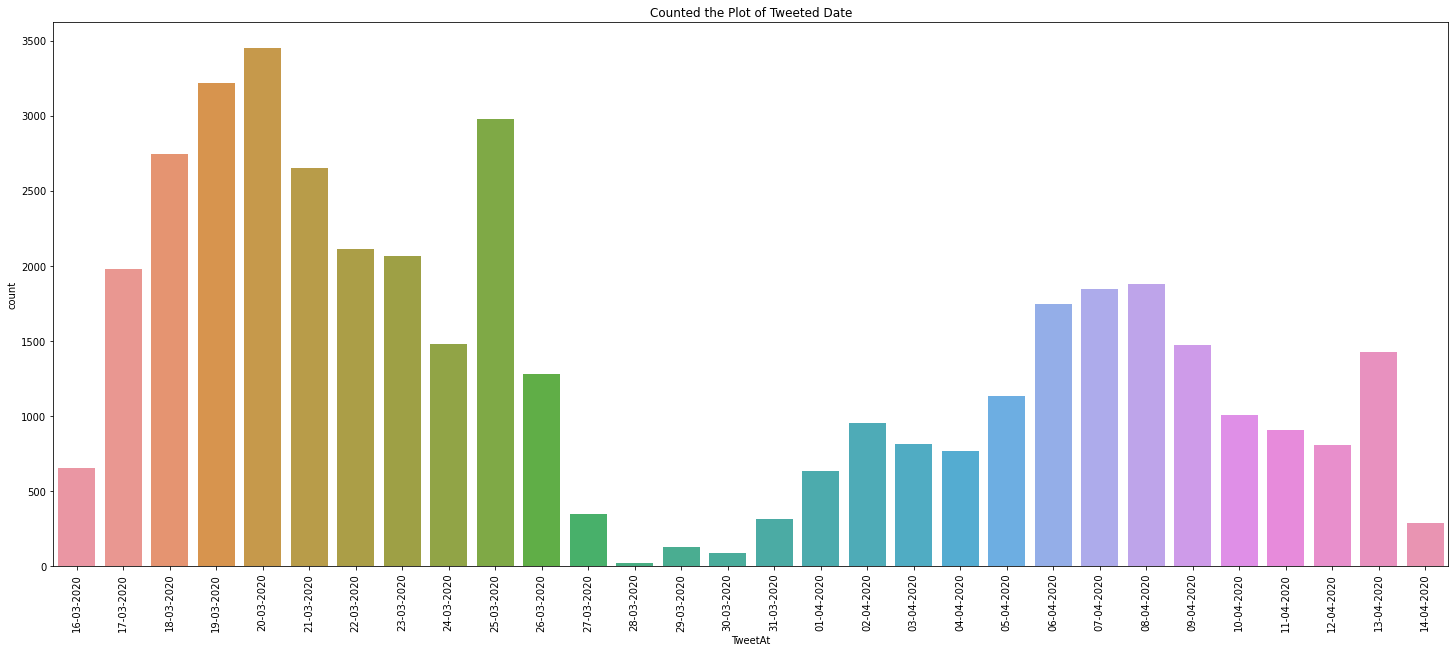

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x=Tweetes_data["TweetAt"])
plt.xticks(rotation=90)
plt.title('Counted the Plot of Tweeted Date')

As we can see that In March Covid-19 was at peak, So there is also peak in the tweets posted by the users. Most number of tweets were between 17th March 2020 to 25th March 2020.

#### Summarization of information present in our given dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a11fc7310>,
      dtype=object)

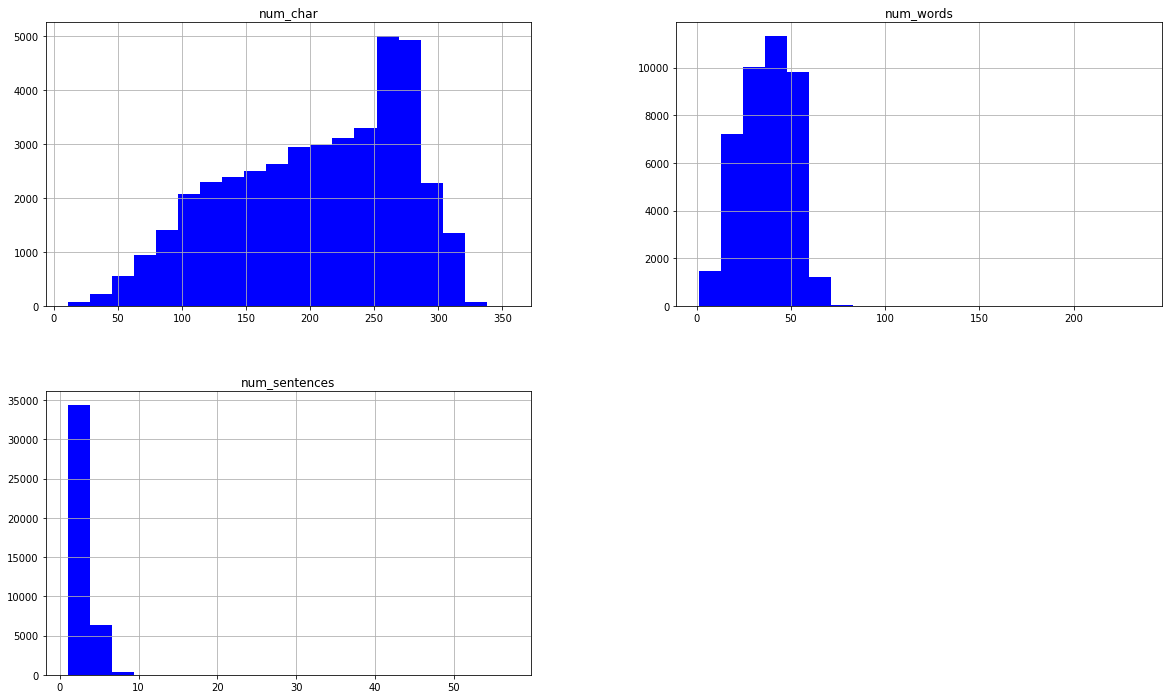

In [ ]:
Tweetes_data[['num_char', 'num_words', 'num_sentences']].hist(bins=20,figsize=(20,12),color="blue")

##### 1. Why did you pick the specific chart?

It is used to summarize data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

The first dataset indicates that each row has unique user names and screen names, which suggests a uniform distribution of data. In addition, an analysis of the "TweetAt" column shows that tweet activity was highest during the third month of the COVID-19 pandemic (March 2020) and the fifth month (May 2020), likely due to the chaos and uncertainty surrounding the initial outbreak. Another observation is that the maximum number of words per tweet is between 200-300, with most tweets having relatively short sentence lengths and a low number of words (less than 50).

##### 3. Will the gained insights help creating a positive business impact? 


The data demonstrates the critical role Twitter can play in quickly disseminating time-sensitive information about the latest COVID-19 case rates and research findings. Twitter has proven to be faster than traditional news media in sharing information, making it an effective tool for businesses to prioritize the latest information and quickly spread important news.

#### Correlation Heatmap

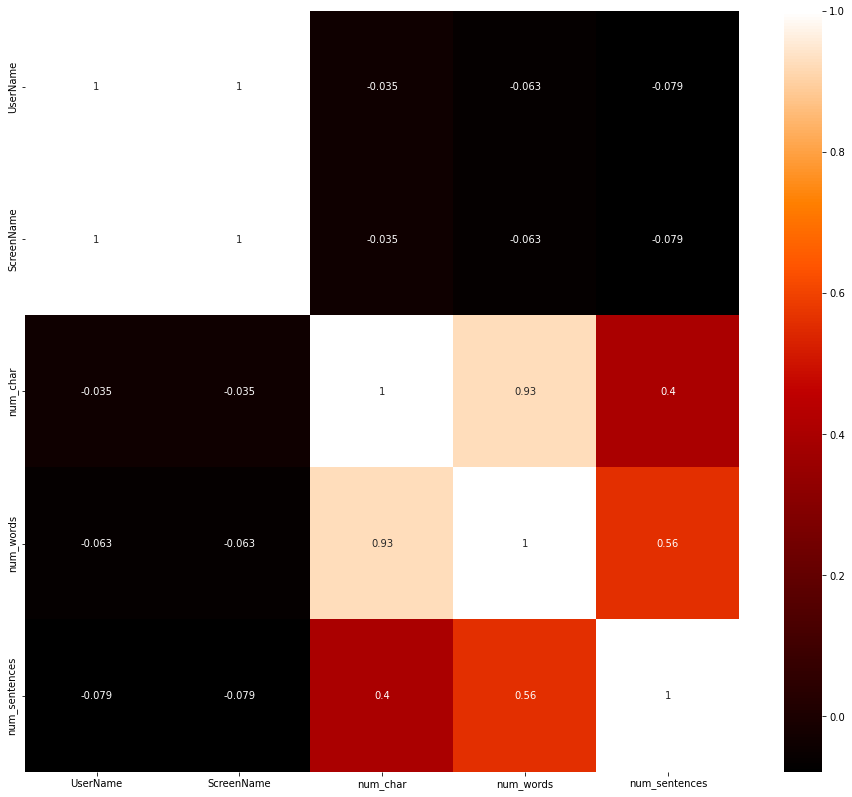

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,14))
sns.heatmap(Tweetes_data.corr(),annot= True, cmap='gist_heat')

##### 1. Why did you pick the specific chart?

Heat Maps are a type of data visualization that use color-coded systems to represent data. Their primary function is to visually represent the volume of locations or events within a dataset, allowing viewers to quickly identify important areas on the visualization. Heat Maps are especially useful for directing viewers' attention to the most significant aspects of the data.

##### 2. What is/are the insight(s) found from the chart?

Given that the dataset we are working with is primarily focused on textual data, a Correlation Heatmap is not a critical tool. However, there are some numerical columns in the dataset, such as UserName, ScreenName, num_char, num_words, and num_sentences. The above visualization displays the correlation between these numerical columns, which reveals a strong positive correlation between the newly created columns and the original tweet column.

3. Will the gained insights help creating a positive business impact?

BY gaining the relatioships between different variables present in the dataset we can model our machine model effectively.

#### Ploting a graph for number of tweets on location basis 

In [ ]:
locations = pd.DataFrame(Tweetes_data.groupby(['Location'])['OriginalTweet'].count().reset_index().sort_values(by = 'OriginalTweet' , ascending = False))

In [ ]:
locations.head()

,Location,OriginalTweet
0,,8590
5691,London,540
10456,United States,528
5766,"London, England",520
7092,"New York, NY",395


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

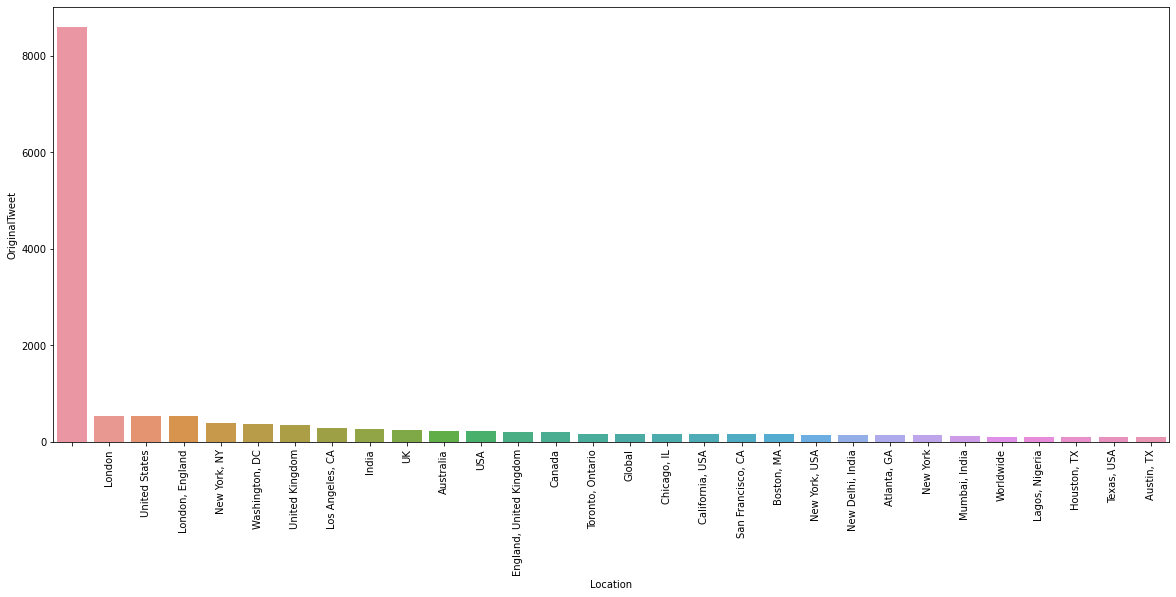

In [ ]:
plt.figure(figsize= (20, 8))
sns.barplot(data = locations.iloc[:30], x = 'Location', y = 'OriginalTweet')
plt.xticks(rotation = 90)

## Feature Engineering & Data Pre-processing

### Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
Tweetes_data.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
num_char         0
num_words        0
num_sentences    0
hash             0
tags             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The location column in our dataset contained exclusively null values, which were substituted with empty strings to facilitate the creation of visualizations.

### Textual Data Preprocessing 


#### Expand Contraction

In the field of natural language processing (NLP), contractions are abbreviated forms of words or phrases commonly used in spoken English, such as "don't" (short for "do not"), "can't" (short for "cannot"), and "I'll" (short for "I will" or "I shall"). These contractions are often used in informal text, including text messages, social media posts, and speech.

To work with contractions in Python, several libraries are available, including the contractions library. This Python library is specifically designed to handle English contractions, providing a straightforward interface for expanding and contracting words and phrases in text.

In [ ]:
# Expand Contraction
!pip install contractions
import contractions

def expand_contractions(text_column):
    expanded_text = [contractions.fix(text) for text in text_column]
    return expanded_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Tweetes_data['originaltweet'] = expand_contractions(Tweetes_data['OriginalTweet'])

In [ ]:
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,My food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,"Me, ready to go at supermarket during the #COV..."


In [ ]:
Tweetes_data['originaltweet'].iloc[3]

'My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, do not panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j'

#### Lower Casing

In [ ]:
# Lower Casing
Tweetes_data["originaltweet"] = Tweetes_data["originaltweet"].str.lower()
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia: woolworths to give elde...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,"me, ready to go at supermarket during the #cov..."


#### Removing Punctuations, URL and html tags

In [ ]:
# write function for removing @user
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# create new column with removed @user
Tweetes_data['originaltweet'] = np.vectorize(remove_pattern)(Tweetes_data['originaltweet'], '@[\w]*')

#Here we are removing the @users from our tweet column as its not important for our analysis.

In [ ]:
Tweetes_data['originaltweet'].iloc[0]

'   https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
#Removing URL and HTML tags
def remove_url(text):
  pattern =re.compile('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*')
  return pattern.sub(r'',text)

Tweetes_data['originaltweet']=Tweetes_data['originaltweet'].apply(remove_url)
Tweetes_data.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia: woolworths to give elde...


In [ ]:
# Remove Punctuations


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

Tweetes_data["originaltweet"] = Tweetes_data["originaltweet"].apply(lambda x: remove_punctuation(x))
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia woolworths to give elder...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,me ready to go at supermarket during the covid...


In [ ]:
Tweetes_data['originaltweet'].iloc[3]

'my food stock is not the only one which is empty\r\r\n\r\r\nplease do not panic there will be enough food for everyone if you do not take more than you need \r\r\nstay calm stay safe\r\r\n\r\r\ncovid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral '

#### Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text_column):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    cleaned_text = []
    for text in text_column:
        text = [word for word in text.split() if word.lower() not in stop_words]
        cleaned_text.append(" ".join(text))
    return cleaned_text


In [ ]:
Tweetes_data['originaltweet'] = remove_stopwords(Tweetes_data['originaltweet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Tweetes_data['originaltweet'].sample(5)

29420    dr deborah birx moment going grocery store goi...
2438     panic buying limited supermarkets pharmacies f...
37047    oura believes data specifically skin temperatu...
20180    survived rationing â survive coronavirus pand...
15007    early morning shopping trip inner voice normal...
Name: originaltweet, dtype: object

#### Removing White Spaces

In [ ]:
# Remove White spaces
def remove_white_spaces(text_column):
    cleaned_text = []
    for text in text_column:
        text = " ".join(text.split())
        cleaned_text.append(text)
    return cleaned_text

In [ ]:
Tweetes_data['originaltweet'] = remove_white_spaces(Tweetes_data['originaltweet'])

In [ ]:
Tweetes_data['originaltweet'].sample(5)

30028    donating help pros amp front lines pandemic ma...
10048    imagine ca looks like 56 supermarket employees...
30883    still waiting someone contact fuel prices drop...
22708    new ecommerce data survey consumers pinpoints ...
6577     need baby milk anything extreme importance sho...
Name: originaltweet, dtype: object

#### Removing Emojis

In [ ]:
#function to remove Emoji
def remove_emojis(text_column):
    cleaned_text = []
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    for text in text_column:
        text = emoji_pattern.sub(r'', text)
        cleaned_text.append(text)
    return cleaned_text

In [ ]:
Tweetes_data['originaltweet'] = remove_emojis(Tweetes_data['originaltweet'])

### Rephrase Text

SpaCy is a popular Python library widely used for natural language processing (NLP). One of the notable features offered by SpaCy is the Matcher class, which enables pattern matching in text using a rule-based approach. The Matcher class allows users to match sequences of tokens in a document, which can be extremely useful for tasks like named entity recognition where one intends to identify specific types of entities such as people, organizations, or locations in text. The spacy.matcher library is specifically designed to work with large volumes of text and can handle multiple languages. The Matcher class is implemented on top of vocabulary and lexemes, and it's part of the Doc or Token, whereas the patterns are defined on the Doc, Token, or Span level.

In [ ]:
# Rephrase Text
import spacy
from spacy.matcher import PhraseMatcher

def rephrase_text(text_column):
    nlp = spacy.load("en_core_web_sm")
    matcher = PhraseMatcher(nlp.vocab)
    rephrased_text = []
    for text in text_column:
        doc = nlp(text)
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]
            span = doc[start:end]
            span.merge()
            span.text = "rephrased version of matched text"
        rephrased_text.append(doc.text)
    return rephrased_text

In [ ]:
Tweetes_data['originaltweet'] = rephrase_text(Tweetes_data['originaltweet'])

In [ ]:
Tweetes_data['originaltweet'].iloc[3]

'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral'

#### Tokenization

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_text(text_column, token_type='word'):
    '''Defining a function to tokenise the words and the sentences'''
    nltk.download('punkt')
    if token_type == 'word':
        tokenizer = word_tokenize
    elif token_type == 'sentence':
        tokenizer = sent_tokenize
    else:
        raise ValueError("Invalid token_type. Choose 'word' or 'sentence'.")
    tokenized_text = []
    for text in text_column:
        tokens = tokenizer(text)
        tokenized_text.append(tokens)
    return tokenized_text

## 1. The above function first checks if the NLTK package 'punkt' is downloaded or not, If not it will download it.

## 2. It takes in two arguments, text_column and token_type. text_column is the input text data that needs to be tokenized and token_type is the type of tokenization 
## that needs to be performed.

## 3. Then it checks the token_type passed to the function, 
## If it is 'word' it will use word_tokenize function and if 'sentence' it will use sent_tokenize function. If any other value is passed it will raise a value error.

## 4. The function then initializes an empty list tokenized_text and for each text in the text_column 
## it tokenizes the text using the tokenizer function, appends the tokens to the tokenized_text list and returns the list of tokenized text.

In [ ]:
Tweetes_data['originaltweet'] = tokenize_text(Tweetes_data['originaltweet'], token_type='sentence')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
Tweetes_data['originaltweet'].iloc[3]

['food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral']

#### Text Normalization

- Stemming
Stemming is a process used in natural language processing to extract the root form of a word by removing its morphological affixes. This is done to simplify the analysis of text data and improve the performance of algorithms. Stemming algorithms are designed to remove affixes that are not part of the core meaning of the word, such as those used for grammatical role, tense, and derivational morphology. However, this can be challenging due to irregular words (such as common English verbs), complex morphological rules, and ambiguities in part-of-speech and sense. For example, "ceil-" is not the stem of "ceiling".

- StemmerI defines a standard interface for stemmers.

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.porter import *
stemmer = PorterStemmer()
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text)) 

In [ ]:
Tweetes_data['originaltweet'] = Tweetes_data['originaltweet'].apply(lambda x: stemming(x))

##### Which text normalization technique have you used and why?



To normalize text by reducing words to their base form or root, we used stemming. This technique is particularly helpful for natural language processing because it reduces the dimensionality of data by decreasing the number of distinct words that need to be analyzed.

In [ ]:
Tweetes_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia woolworths give elderly ...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,food stock one empty please panic enough food ...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,ready go supermarket covid19 outbreak paranoid...


In [ ]:
final_td = Tweetes_data[['originaltweet', 'Sentiment']]

#### WordPlot After Text Preprocessing

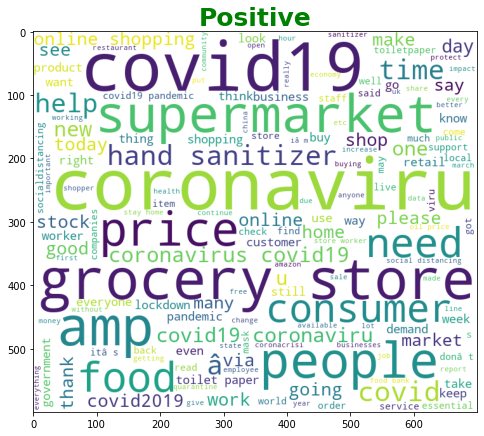

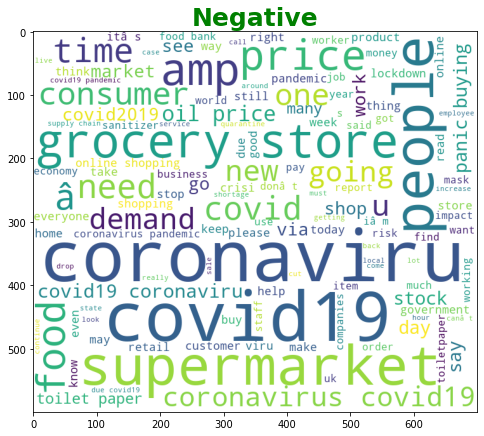

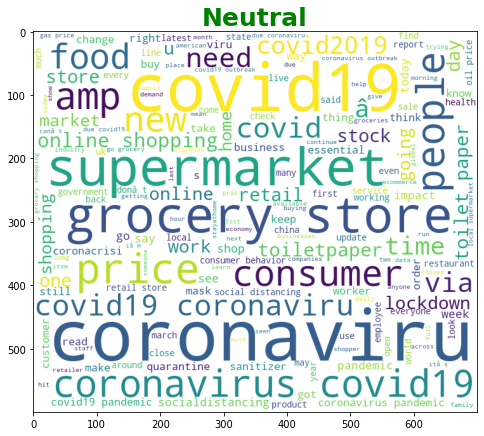

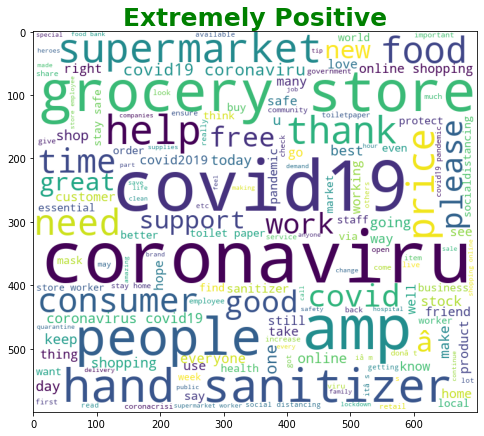

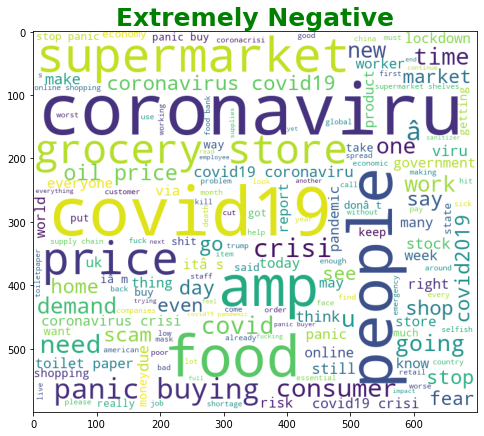

In [ ]:
world_cloud = WordCloud(width=700,height=600,min_font_size=10,background_color='white')
sentiment_list = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
for i in sentiment_list:
  positive_tweet = world_cloud.generate(Tweetes_data[Tweetes_data['Sentiment'] == i]['originaltweet'].str.cat(sep=" "))
  plt.figure(figsize=(15,7))
  plt.title(i, fontsize=25, color='green', fontweight='bold')
  plt.imshow(positive_tweet)
  

* In all types of sentiment, the words like Coronavirus, people, supermarket, grocery store, covid 19, food etc. are extensively used in the tweets.

* Words like hand sanitizer, thank you, price are most used in tweets with 
positive sentiment
* Words like panic, toilet paper, covid related words are most used in tweets with negative setniment.

### Applying Label Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

In [ ]:
new_td= Tweetes_data[['originaltweet','Sentiment']]

In [ ]:
## 3 class Classification
new_td["Sentiment"]= new_td["Sentiment"].replace('Positive',3) 
new_td["Sentiment"]= new_td["Sentiment"].replace('Extremely Positive',3) 
new_td["Sentiment"]= new_td["Sentiment"].replace('Neutral',2) 
new_td["Sentiment"]= new_td["Sentiment"].replace('Negative',1) 
new_td["Sentiment"]= new_td["Sentiment"].replace('Extremely Negative',1) 

# We have encoded our 5 categorical classes of target variable into 3, in order to perform the multiclass classification

#### Text Vectorization

In [ ]:
x = new_td['originaltweet']


In [ ]:
#TfidVectorizer 3 class

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(x)


In [ ]:
y = new_td['Sentiment']

#### Which text vectorization technique have you used and why?

Here we have used TF-IDF (term frequency-inverse document frequency) which is a numerical statistic that is used to reflect the importance of a word within a document.

TF-IDF is a powerful technique for extracting features from text data and can be used to improve the performance of a wide range of natural language processing and text mining tasks.

Here are a few reasons why we use TF-IDF:

1. It is able to down-weight the importance of commonly used words, such as "the" and "is," which are known as stop words. This can lead to better-performing models, as these words don't contain much information.

2. It is able to weight words based on their rarity across all documents. So, words that appear in many documents will have a lower weight than words that appear in only a few. This can be useful for identifying important keywords that are unique to a particular document.

3. It gives greater weight to words that appear more often in a document, but not in many documents. This can be useful for identifying important keywords that are unique to a particular document.

4. It performs much better than the Bag of words approach in text classification and clustering.


### Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
new_td['Sentiment'].value_counts()

3    18046
1    15398
2     7713
Name: Sentiment, dtype: int64

Yes, the dataset is imbalanced because of the lesser number of values present in class 2.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
#import library for 3 class classification

from imblearn.over_sampling import SMOTE

# transform the dataset
oversampled = SMOTE()

X_smote, Y_smote = oversampled.fit_resample(X, y)
     

In order to address the imbalanced dataset issue, we utilized SMOTE, an algorithm that can balance class distributions within a dataset. It is common in machine learning to encounter imbalanced datasets, where one class of data points is much more prevalent than the others.


We have used SMOTE because of the following reasons:

1. It increases the minority class without creating duplicates.
2. It can balance the class distribution by either over-sampling the minority class or under-sampling the majority class.
3. It can be used to prevent overfitting on imbalanced datasets.



##### Which all features you found important and why?

OriginalTweet and Sentiment are our main features which have been already assigned in X and y

### Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=.25, random_state=42)

##### What data splitting ratio have you used and why? 

We have splitted our data into 75-25 ratio, where 75% of the observations will go into training dataset and 25% of the observations will go into testing data.

## **ML Model Implementation**

### 1. Applying Logistic Regression

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# classification Ml models
logitic_regression_multiclass = LogisticRegression()

In [ ]:
# Fitting the logistic regression model
logitic_regression_multiclass.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Calculating accuracy on test data
y_predication = logitic_regression_multiclass.predict(X_test)
accuracy = accuracy_score(y_test, y_predication)

print('Accuracy score = ', accuracy)

Accuracy score =  0.8093091983745844


In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_predication, y_test))

              precision    recall  f1-score   support

           1       0.77      0.82      0.80      4277
           2       0.90      0.77      0.83      5158
           3       0.76      0.85      0.80      4100

    accuracy                           0.81     13535
   macro avg       0.81      0.81      0.81     13535
weighted avg       0.82      0.81      0.81     13535



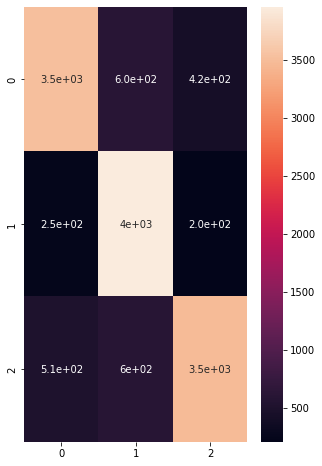

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(5,8))
sns.heatmap(confusion_matrix(y_test, y_predication), annot=True)

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
#ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
parameter = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search_lg = GridSearchCV(logitic_regression_multiclass, parameter,cv=10)

In [ ]:
# Fitting grid search on logistic regression
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [ ]:
#Best parameters after applying gridsearch cv
print("Best parameters: ", grid_search_lg.best_params_)

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [ ]:
y_predication = grid_search_lg.predict(X_test)

In [ ]:
## Printing the accuracy after applying cross validation
accuracy = accuracy_score(y_test, y_predication)
print("Accuracy is: ", accuracy)

Accuracy is:  0.832508311784263


In [ ]:
## Classification report after applying gridsearch cross validation technique
print(classification_report(y_predication, y_test))

              precision    recall  f1-score   support

           1       0.81      0.84      0.82      4382
           2       0.91      0.81      0.86      4932
           3       0.79      0.86      0.82      4221

    accuracy                           0.83     13535
   macro avg       0.83      0.83      0.83     13535
weighted avg       0.84      0.83      0.83     13535



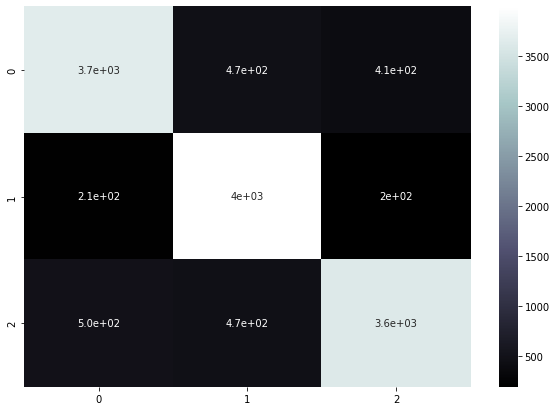

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_predication), annot=True, cmap='bone')

##### Which hyperparameter optimization technique have you used and why?

We have used Gridsearch cross validation to find the optimal set of hyperparameters for a machine learning model.

The method of GridSearchCV conducts a thorough search over a specified grid of parameters, assessing the performance of the model for every combination of parameters using cross-validation.

We use GridSearchCV because of the following reasons:

1. By automating the process of tuning the hyperparameters, GridSearchCV saves time and effort that would otherwise be spent on manually trying out different parameter combinations.

2. It provides the best combination of hyperparameters that can maximize the model's performance.

3. It helps to prevent overfitting by evaluating the model's performance on different data subsets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in our model, our accuracy on test data got increased to 83%, while earlier it was 81%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

There are several evaluation metrics that we used to evaluate the performance of our logistic regression model for sentiment prediction on COVID-19 tweets. 

1. **Accuracy**: This metric measures the proportion of correctly classified samples out of all samples. It indicates how well the model is able to predict the correct sentiment for tweets.

2. **Precision**: Precision is the proportion of true positive predictions out of all positive predictions. It indicates how many of the tweets the model predicted as positive are actually positive. High precision means that the model is not giving many false positives.

3. **Recall**: Recall is the proportion of true positive predictions out of all actual positive samples. It indicates how many of the actual positive tweets the model is able to predict. High recall means that the model is not missing many actual positive tweets.

4. **F1-score**: The F1-score is a harmonic mean of precision and recall, and it is used to balance the trade-off between precision and recall. 

Overall, a high accuracy which is 83% here, precision and recall, and F1-score which are all above 80% in this case would indicate that the model is performing well and it is able to predict the sentiment of the tweets accurately. This would have a positive impact on the business as it can be used to monitor the public opinion and sentiment towards the COVID-19 pandemic and take necessary actions accordingly.

### 2. SVC Classifier

In [ ]:
# Visualizing evaluation Metric Score chart
Support_vector_Machine_classifier = SVC(kernel='linear', C=1)


In [ ]:
Support_vector_Machine_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Calculating accuracy on test data
y_predication = Support_vector_Machine_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predication)

print('Accuracy score are  = ', accuracy)

Accuracy score are  =  0.8286664203915773


#### Cross- Validation & Hyperparameter Tuning

In [ ]:
parameter_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}

In [ ]:
grid_search_Support_vector_Machine_classifier = RandomizedSearchCV(estimator=Support_vector_Machine_classifier.fit(X_train, y_train), param_distributions =parameter_grid, cv=6, verbose = 10, n_jobs = 1)
grid_search_Support_vector_Machine_classifier.fit(X_train, y_train)

Fitting 6 folds for each of 4 candidates, totalling 24 fits
[CV 1/6; 1/4] START C=1, kernel=linear..........................................
[CV 1/6; 1/4] END ...........C=1, kernel=linear;, score=0.817 total time= 6.5min
[CV 2/6; 1/4] START C=1, kernel=linear..........................................
[CV 2/6; 1/4] END ...........C=1, kernel=linear;, score=0.813 total time= 6.9min
[CV 3/6; 1/4] START C=1, kernel=linear..........................................
[CV 3/6; 1/4] END ...........C=1, kernel=linear;, score=0.815 total time= 6.5min
[CV 4/6; 1/4] START C=1, kernel=linear..........................................
[CV 4/6; 1/4] END ...........C=1, kernel=linear;, score=0.821 total time= 6.4min
[CV 5/6; 1/4] START C=1, kernel=linear..........................................
[CV 5/6; 1/4] END ...........C=1, kernel=linear;, score=0.808 total time= 6.2min
[CV 6/6; 1/4] START C=1, kernel=linear..........................................
[CV 6/6; 1/4] END ...........C=1, kernel=linear;,

In [ ]:
print("Best hyperparameters are : ", grid_search_Support_vector_Machine_classifier.best_params_)

In [ ]:
y_pred_svc = grid_search_Support_vector_Machine_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy is : ", accuracy)

##### Which hyperparameter optimization technique have you used and why?

We have used Gridsearch cross validation to find the optimal set of hyperparameters for a machine learning model.

The GridSearchCV method performs an exhaustive search over a specified parameter grid, evaluating the model performance for each combination of parameters using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We were not able to check any improvement there as it was taking so much time to run. We tried running it for 2 hours and even more than that, but still no output was there. 

In [ ]:
print(classification_report(y_test, y_predication_svc))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(10,9))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True)

Here we got testing accuracy of 83%, which means that business can predict sentiment with 83% accuracy. And here, in this Support vector Classifier model, precision, recall and f1 score are all nearly equal to and more than 80%.

There are several evaluation metrics that we used to evaluate the performance of our logistic regression model for sentiment prediction on COVID-19 tweets.

1. Accuracy: This metric measures the proportion of correctly classified samples out of all samples. It indicates how well the model is able to predict the correct sentiment for tweets.

2. Precision: Precision is the proportion of true positive predictions out of all positive predictions. It indicates how many of the tweets the model predicted as positive are actually positive. High precision means that the model is not giving many false positives.

3. Recall: Recall is the proportion of true positive predictions out of all actual positive samples. It indicates how many of the actual positive tweets the model is able to predict. High recall means that the model is not missing many actual positive tweets.

4. F1-score: The F1-score is a harmonic mean of precision and recall, and it is used to balance the trade-off between precision and recall.

### 3. SGD Classifier

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
Stochastic_Gradient_Descent_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42)


In [ ]:
## Fitting the algorithm
Stochastic_Gradient_Descent_classifier.fit(X_train, y_train)

In [ ]:
## Prediciting results and calculating accuracy
sgd_prediction = Stochastic_Gradient_Descent_classifier.predict(X_test)
sgd_train_accuracy = Stochastic_Gradient_Descent_classifier.score(X_train,y_train)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("training accuracy Score    : ",sgd_train_accuracy)
print("testing accuracy Score : ",sgd_accuracy )

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(sgd_prediction,y_test))

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
## Defining the grid for the parameters
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}


In [ ]:
grid_search = GridSearchCV(Stochastic_Gradient_Descent_classifier, param_grid, cv=5)

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

In [ ]:
## Calculating predictions and accuracy after applying grid search on sgd
sgd_grid_prediction = grid_search.predict(X_test)
sgd_grid_train_accuracy = grid_search.score(X_train,y_train)
sgd_grid_accuracy = accuracy_score(y_test,sgd_grid_prediction)
print("The Training accuracy Score is : ",sgd_grid_train_accuracy)
print("The Testing accuracy Score is  : ",sgd_grid_accuracy )

In [ ]:
## Classification Report
print(classification_report(sgd_grid_prediction, y_test))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_predication), annot=True, cmap='afmhot')

After applying grid search on sgd classifier, we got accuracy of 82% which is good because grid search has increased the accuracy of our Stochastic Gradient Descent classifier(SGD) by hyperparameter optimization.

### **Comparing Different Models**

In [ ]:

# Instantiate  models
models = [
          ['NaiveByes_clf: ',MultinomialNB()],
          ['SGD_clf: ', SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ', RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ', SVC()],
          ['Logistic_clf: ', LogisticRegression()]
]       
     

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    end = time.time()
    model.fit(X_train,y_train) 
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(y_train, model.predict(X_train))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(y_test, model.predict(X_test))

    model_data.append(model_data_dic)
     

In [ ]:

# Convert list to dataframe
Convert_list = pd.DataFrame(model_data)
print(Convert_list)

In [ ]:
sorted_models= Convert_list.sort_values(by='Test_Accuracy', ascending=False)
sorted_models

In [ ]:
sns.barplot(data=sorted_models, x='Test_Accuracy', y='Name')

Support Vector Classifier gives us the best test accuracy, i.e. = 82.8%

### Which ML model did you choose from the above created models as your final prediction model and why?

Our Final ML Model is Support Vector Classifier, which gives the accuracy of 83% on test data. 

### **Saving the model in Pickle file**

In [ ]:
# Save the File
import pickle

# Save the model to a file
with open('svc_clf.pkl', 'wb') as file:
    pickle.dump(Support_vector_Machine_classifier, file)

In [ ]:
# Load the model from the file
with open('svc_clf.pkl', 'rb') as file:
    Support_vector_Machine_classifier = pickle.load(file)

### **Challenges Faced**

* Lot of time is required to run grid search cv on support vector classifier.
* While running complex algorithms and models colab was crashing sometimes, and we had to restart running all the cells from beginning.
* As Data is related to natural language processing sentiment analysis, Time required for data pre processing is high.
* As it was textual data, it took time to understand different features in our dataset.
* Out of so many available machine learning algorithms it took lot of experimentation to decide the best model to predict the sentiment.

# **Conclusion**

For this project, we analyzed tweets about COVID-19 by conducting exploratory data analysis, implementing various text preprocessing techniques, vectorizing the textual data, and addressing imbalances in the dataset. Ultimately, we developed several machine learning models, with the Support Vector Classifier proving to be the most effective as it yielded the highest accuracy on test data in comparison to the other models.

                                                   Some of the key insights found from this project are as follows👇🏻-:

* The majority of the tweets were posted during March and April 2020, which coincided with the initial outbreak of COVID-19 and the subsequent imposition of lockdown measures by many countries worldwide.

* Most of the sentiments expressed are positive, as individuals strive to maintain a courageous outlook in the face of the pandemic.

* The analysis did not require the use of Username and ScreenName as they exclusively contained unique IDs.

* The US, UK, and India were the most heavily impacted regions, and thus the majority of tweets originated from these locations.

* Most of the hashtags used in tweets will be either #COVID19 or #coronavirus.

* "Food" and "coronavirus" or "COVID-19" are likely to be among the most frequently used words, given the shortage of food in grocery stores that occurred during the pandemic.

* We generated new features, such as num_char, num_words, and num_sentences, to evaluate the sentiment of tweets. Our findings indicated that tweets with more words, characters, and sentences tend to have a more positive sentiment. In contrast, tweets with a neutral sentiment typically have fewer words, characters, and sentences.

* In the event that the multiclass models did not yield satisfactory results, we would consider converting the problem into a binary classification by altering the target variable to (0 and 1).

* Regarding vectorization, we attempted TF-IDF vectorization and employed the SMOTE over-sampling technique to balance the data due to the predominance of positive tweets.

* Feature importance was determined by the most commonly occurring words in each class. Based on our analysis, the locations with the highest number of tweets were London, United States, New York, Washington DC, United Kingdom, India, Australia, and USA.

* We observed that the greatest number of tweets were posted on March 20, 2020, when the first lockdown was announced. Twitter activity was highest in March as it marked the early stages of the COVID-19 pandemic, and people were seeking information about the disease.

* The multi-class models were assessed across categories, which included positive, neutral, and negative.

* Several classification machine learning models were utilized, with the Support Vector Classifier exhibiting the highest accuracy on the testing data.

* And at last we saved our SVC model into a pickle file for further process of deployment.